<p>This notebook requires images in a directory with the following structure:
<code>
signs
    test
        stop
        no-vehicles
    train
        vehicles
        no-vehicles
</code>

In [1]:
!pip install matplotlib
!pip install opencv-python
!pip install numpy
!pip install keras
!pip install keras-models

from keras.models import load_model
from keras.models import Model
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.preprocessing import image

In [2]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [3]:
# width,height,channels
image_shape = (150,150,3)

In [4]:
model = Sequential()
model.reset_states() # not sure when I should do this. 

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

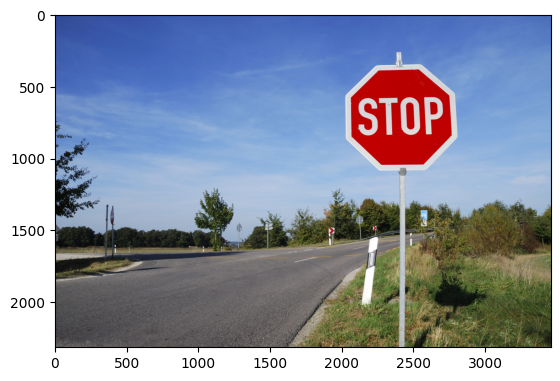

In [6]:
car1 = cv2.imread('C:/Users/JO/Downloads/signs/test/stop/2.jpg')
car1 = cv2.cvtColor(car1,cv2.COLOR_BGR2RGB)
plt.imshow(car1)

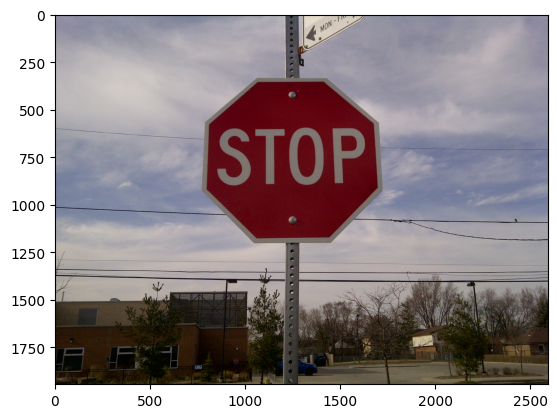

In [7]:
car2 = cv2.imread('C:/Users/JO/Downloads/signs/test/stop/8.jpg')
car2 = cv2.cvtColor(car2,cv2.COLOR_BGR2RGB)
plt.imshow(car2)

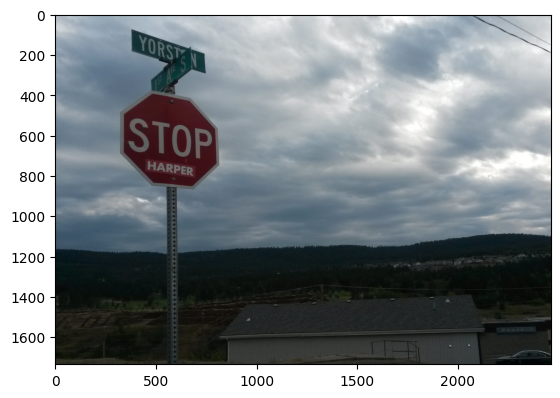

In [8]:
car3 = cv2.imread('C:/Users/JO/Downloads/signs/test/stop//10.jpg')
car3 = cv2.cvtColor(car3,cv2.COLOR_BGR2RGB)
plt.imshow(car3)

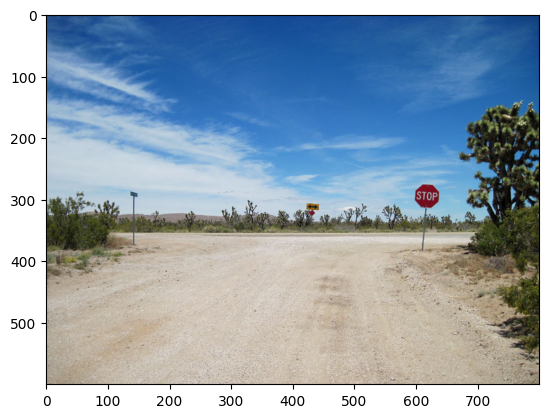

In [9]:
car4 = cv2.imread('C:/Users/JO/Downloads/signs/test/stop/28.jpg')
car4 = cv2.cvtColor(car4,cv2.COLOR_BGR2RGB)
plt.imshow(car4)

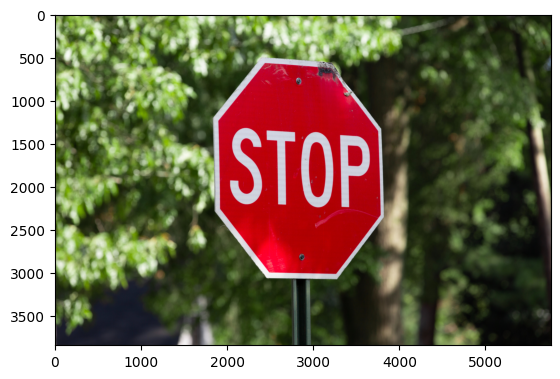

In [10]:
car5 = cv2.imread('C:/Users/JO/Downloads/signs/test/stop/43.jpg')
car5 = cv2.cvtColor(car5,cv2.COLOR_BGR2RGB)
plt.imshow(car5)

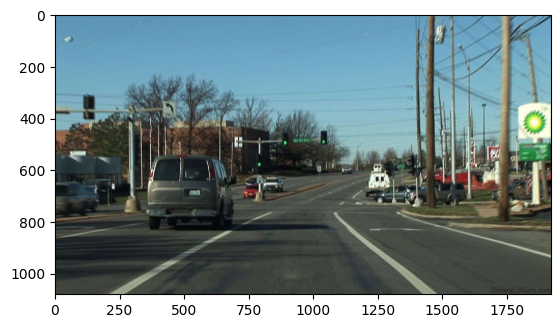

In [11]:
ncar1 = cv2.imread('C:/Users/JO/Downloads/signs/test/no-stop/102.jpg')
ncar1 = cv2.cvtColor(ncar1,cv2.COLOR_BGR2RGB)
plt.imshow(ncar1)

In [12]:
ncar2 = cv2.imread('C:/Users/JO/Downloads/signs/test/no-stop/111.jpg')
ncar2 = cv2.cvtColor(ncar2,cv2.COLOR_BGR2RGB)
plt.imshow(ncar2)

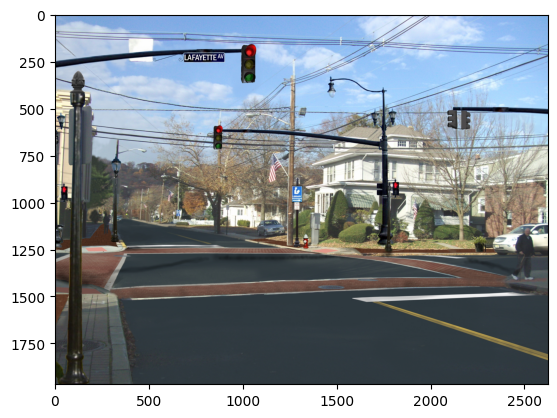

In [13]:
ncar3 = cv2.imread('C:/Users/JO/Downloads/signs/test/no-stop/129.jpg')
ncar3 = cv2.cvtColor(ncar3,cv2.COLOR_BGR2RGB)
plt.imshow(ncar3)

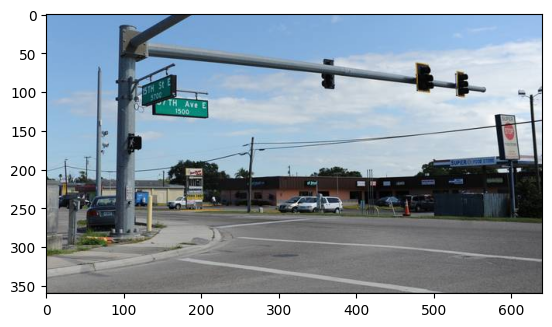

In [14]:
ncar4 = cv2.imread('C:/Users/JO/Downloads/signs/test/no-stop/133.jpg')
ncar4 = cv2.cvtColor(ncar4,cv2.COLOR_BGR2RGB)
plt.imshow(ncar4)

In [15]:
vehicle_file = 'C:/Users/JO/Downloads/signs/test/no-stop/107.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

1/1 [==============================] - 0s 137ms/step
Probability that image is a stop sign is: [[0.5078958]] 


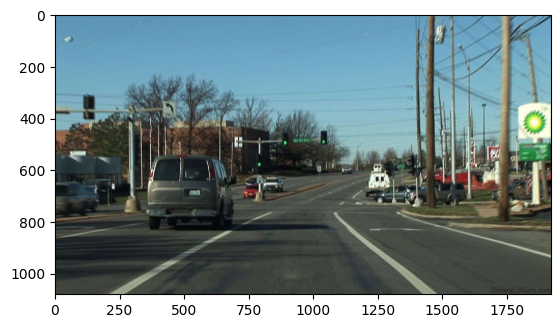

In [16]:
plt.imshow(ncar1)

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:

image_gen = ImageDataGenerator(rotation_range=5, # rotate the image 5 degrees
                               width_shift_range=0.2, # Shift the pic width by a max of 10%
                               height_shift_range=0.2, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalizing it.
                               shear_range=0.02, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.02, # Zoom in by 20% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

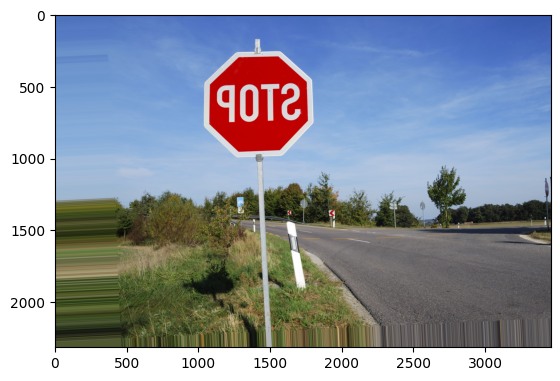

In [19]:
plt.imshow(image_gen.random_transform(car1))

In [20]:
plt.imshow(image_gen.random_transform(ncar1))

plt.imshow(image_gen.random_transform(no_car1))

In [21]:
print('image shapes. ',car1.shape,' no sign: ',ncar1.shape)

image shapes.  (2316, 3460, 3)  no sign:  (1080, 1920, 3)


In [22]:
source_dir = 'C:/Users/JO/Downloads/signs/train'
image_gen.flow_from_directory(source_dir) #

Found 251 images belonging to 2 classes.


In [23]:
batch_size = 10
train_set = 'C:/Users/JO/Downloads/signs/train'
train_image_gen = image_gen.flow_from_directory(train_set,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 251 images belonging to 2 classes.


In [24]:
test_set = 'C:/Users/JO/Downloads/signs/test'
test_image_gen = image_gen.flow_from_directory(test_set,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 10 images belonging to 2 classes.


In [25]:
train_image_gen.class_indices

{'no-vehicles': 0, 'vehicles': 1}

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
epochs = 50

In [28]:
# model.reset_states() # not sure when I should do this. It doesn't actually reset anything!
results = model.fit_generator(train_image_gen,epochs=epochs,
                              
                              validation_data=test_image_gen,
                              )


Epoch 1/50
26/26 [==============================] - 9s 288ms/step - loss: 0.5392 - accuracy: 0.6773 - val_loss: 0.4845 - val_accuracy: 0.8000
Epoch 2/50
26/26 [==============================] - 6s 237ms/step - loss: 0.4638 - accuracy: 0.7649 - val_loss: 0.4891 - val_accuracy: 0.8000
Epoch 3/50
26/26 [==============================] - 6s 244ms/step - loss: 0.3828 - accuracy: 0.8367 - val_loss: 0.3956 - val_accuracy: 0.8000
Epoch 4/50
26/26 [==============================] - 6s 242ms/step - loss: 0.3518 - accuracy: 0.8367 - val_loss: 0.4466 - val_accuracy: 0.6000
Epoch 5/50
26/26 [==============================] - 6s 235ms/step - loss: 0.4522 - accuracy: 0.7809 - val_loss: 0.4734 - val_accuracy: 0.8000
Epoch 6/50
26/26 [==============================] - 6s 243ms/step - loss: 0.3869 - accuracy: 0.8446 - val_loss: 0.3552 - val_accuracy: 0.8000
Epoch 7/50
26/26 [==============================] - 6s 235ms/step - loss: 0.3271 - accuracy: 0.8606 - val_loss: 0.3327 - val_accuracy: 0.9000
Epoch 

In [29]:
model.save('signs.h5')

In [30]:
results.history['accuracy'][epochs-1] # ending accuracy

0.9083665609359741

In [31]:
plt.plot(results.history['accuracy'])

l

In [32]:
train_image_gen.class_indices

{'no-vehicles': 0, 'vehicles': 1}

1/1 [==============================] - 0s 16ms/step
Probability that image is a stop sign is: [[1.]] 


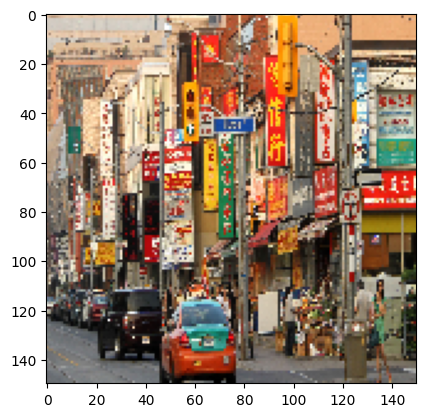

In [33]:
vehicle_file = 'C:/Users/JO/Downloads/signs/test_set_stop_not_stop/not_stop_1.jpeg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

1/1 [==============================] - 0s 31ms/step
Probability that image is a stop sign is: [[1.4980582e-10]] 


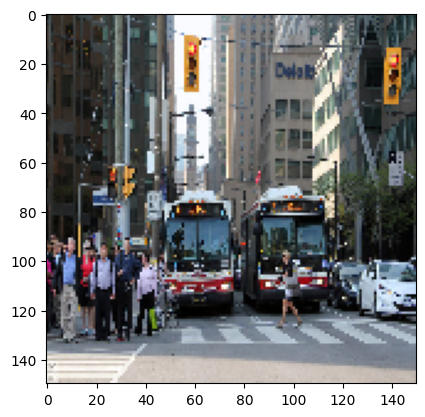

In [34]:
vehicle_file = 'C:/Users/JO/Downloads/signs/test_set_stop_not_stop/not_stop_2.jpeg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

In [35]:
vehicle_file = 'C:/Users/JO/Downloads/signs/test_set_stop_not_stop/not_stop_3.jpeg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

1/1 [==============================] - 0s 16ms/step
Probability that image is a stop sign is: [[0.99999994]] 


In [36]:
vehicle_file = 'C:/Users/JO/Downloads/signs/test_set_stop_not_stop/not_stop_4.jpeg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

1/1 [==============================] - 0s 31ms/step
Probability that image is a stop sign is: [[8.2704155e-14]] 


1/1 [==============================] - 0s 31ms/step
Probability that image is a stop sign is: [[1.]] 


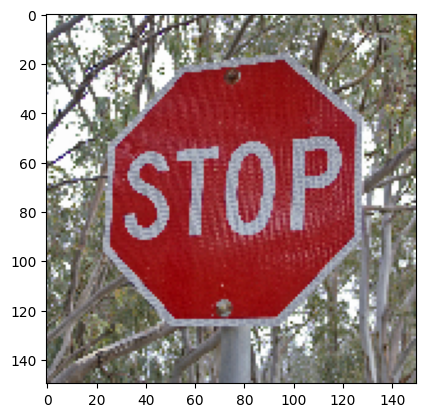

In [37]:
vehicle_file = 'C:/Users/JO/Downloads/signs/test_set_stop_not_stop/stop_1.jpeg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

In [38]:
vehicle_file = 'C:/Users/JO/Downloads/signs/test_set_stop_not_stop/stop_2.jpeg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

1/1 [==============================] - 0s 16ms/step
Probability that image is a stop sign is: [[1.]] 


In [39]:
vehicle_file = 'C:/Users/JO/Downloads/signs/test_set_stop_not_stop/stop_3.jpeg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

1/1 [==============================] - 0s 31ms/step
Probability that image is a stop sign is: [[1.]] 


In [40]:
vehicle_file = 'C:/Users/JO/Downloads/signs/test_set_stop_not_stop/stop_4.jpeg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

1/1 [==============================] - 0s 16ms/step
Probability that image is a stop sign is: [[1.]] 


 Find an image of a street without a stop sign or with a stop sign that will be incorrectly classified by your classifier. Seal of the city of East Palo Alto.  



1/1 [==============================] - 0s 16ms/step
Probability that image is a stop sign is: [[0.99201137]] 


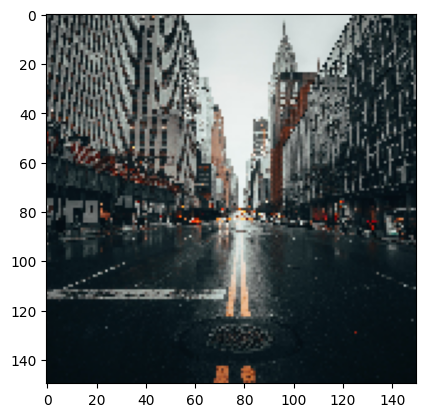

In [41]:
vehicle_file = 'C:/Users/JO/Downloads/josh-hild-bSM_jWP5gwc-unsplash.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

1/1 [==============================] - 0s 31ms/step
Probability that image is a stop sign is: [[1.9056704e-05]] 


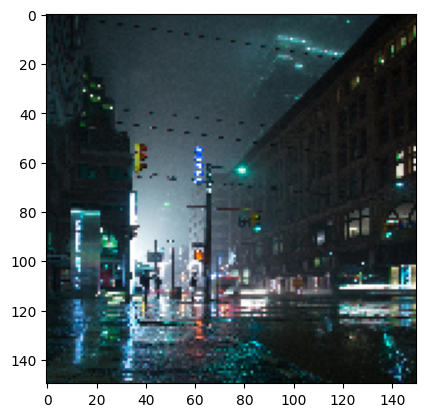

In [42]:
vehicle_file = 'C:/Users/JO/Downloads/filip-mroz-VH7NuUbj104-unsplash.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

In [43]:
vehicle_file = 'C:/Users/JO/Downloads/ryan-kwok-Y2nWxC0tJjc-unsplash.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

1/1 [==============================] - 0s 16ms/step
Probability that image is a stop sign is: [[0.02798278]] 


In [44]:
vehicle_file = 'C:/Users/JO/Downloads/will-porada-ZaGcU6BxJEc-unsplash.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/JO/Downloads/will-porada-ZaGcU6BxJEc-unsplash.jpg'